In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import hashlib
import numpy as np
from matplotlib import rc
from ProjectAnalysis import ProjectAnalysis

In [2]:
common_errors = [
    'gradlew: No such file or directory',
    'can\'t read buildSrc/build.gradle: No such file or directory',
    '> Could not find (.*)',
    'Exception in thread (.+)',
    'Execution failed for task (.+)',
    'A problem occurred evaluating script',
    'unable to resolve class (.+)',
]
pa = ProjectAnalysis("Mockito",  1)

In [3]:
pa.df().head()

,id,commit,build,exec_time,comment,fix
0,0,4e9d76078,SUCCESS,58,Fixes #188 : attempt to implement logic for va...,{'lastFix': 'NO'}
1,1,837fd054a,SUCCESS,5,Fixes #188 : logic reverted to state when Mock...,{'lastFix': 'NO'}
2,2,144e32d26,SUCCESS,5,Fixes #188 : added test that revealed bug.,{'lastFix': 'NO'}
3,3,41b184237,SUCCESS,4,Fixes #188 : Cleaned CapturingArgumentsTest a ...,{'lastFix': 'NO'}
4,4,0cd01b9d9,SUCCESS,5,Merge pull request #219 from SimenB/gitattributes,{'lastFix': 'NO'}


## Calculate the number of builds of each type

In [4]:
pa.df()[(pa.df()['build'] == 'SUCCESS')].count()

id           538
commit       538
build        538
exec_time    538
comment      538
fix          538
dtype: int64

In [5]:
pa.df()[(pa.df()['build'] == 'FAIL')].count()

id           2101
commit       2101
build        2101
exec_time    2101
comment      2101
fix          2101
dtype: int64

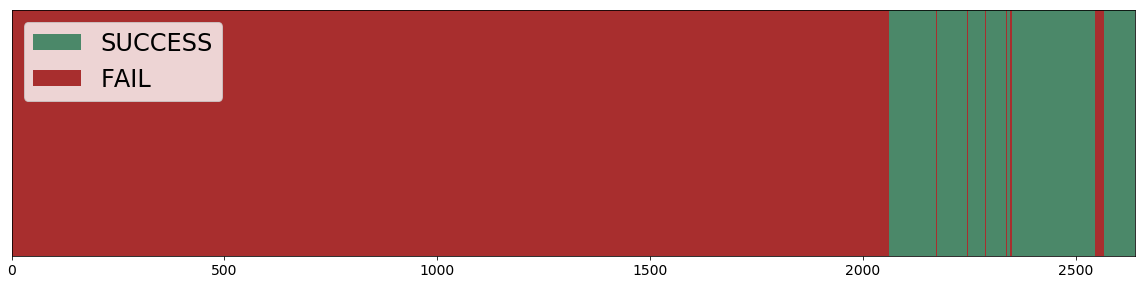

In [6]:
pa.plot_and_save_histogram(1)

## Recogemos todos los fails, los separamos en grupos y obtenemos los logs de cada commit con build fail

In [7]:
fails, groups_of_fails = pa.get_fails_and_grouped_fails()

## Agrupamos los commits por sus logs

In [8]:
errors = pa.group_errors_by_log(fails, common_errors)

In [9]:
df = pd.DataFrame.from_dict(errors, orient='index')
df=df.groupby(['key','trace']).agg({'count': 'sum'}).sort_values(by=['count'], ascending=False)
df.to_csv("%s_errors.csv"%pa.project, sep='\t', encoding='utf-8')
df

,,count
key,trace,
ccdb01712ea99a72ad11e3dc5e165303,gradlew: No such file or directory,1622
a254ff36f6608af906c6b5e4e7ddb8b4,can't read buildSrc/build.gradle: No such file or directory,440
b1c3a9d17cbf10dca660db9bd557f14b,> Could not find net.bytebuddy:byte-buddy:0.2.0.,14
0594fdf03d8d3863dea449a3cd757a1b,A problem occurred evaluating script,9
bab99632d8032cf44a63b74974c880ee,Execution failed for task ':jar'.,6
6d7118d1d7d09430772279885001c4d5,Execution failed for task ':compileGroovy'.,4
4effca87e222b864fc3aff5de2976dd1,Execution failed for task ':compileJava'.,3
f9d727cb95f73cbd20ee6fd3ef6714aa,unable to resolve class ReleaseNotesServices,2
fa5dfe1357b212b35aba8ae5e1ca662a,> Could not find property 'PublicationsComparatorTask' on root project 'mockito'.,1


In [10]:
pa.view_log_by_hash(errors,'f9d727cb95f73cbd20ee6fd3ef6714aa', 0)

Total commits: 2 | Current commit: fae96f44a | Log: 

Parallel execution is an incubating feature.
:buildSrc:clean UP-TO-DATE
:buildSrc:compileJava UP-TO-DATE
:buildSrc:compileGroovyNote: /bugs/projects/Mockito/buildSrc/src/main/groovy/org/mockito/release/comparison/ZipCompare.java uses unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.

:buildSrc:processResources UP-TO-DATE
:buildSrc:classes
:buildSrc:jar
:buildSrc:assemble
:buildSrc:compileTestJava UP-TO-DATE
:buildSrc:compileTestGroovy UP-TO-DATE
:buildSrc:processTestResources UP-TO-DATE
:buildSrc:testClasses UP-TO-DATE
:buildSrc:test UP-TO-DATE
:buildSrc:check UP-TO-DATE
:buildSrc:build
Version: 1.10.13

FAILURE: Build failed with an exception.

* Where:
Script '/bugs/projects/Mockito/gradle/release-notes.gradle' line: 17

* What went wrong:
Could not compile script '/bugs/projects/Mockito/gradle/release-notes.gradle'.
> startup failed:
  script '/bugs/projects/Mockito/gradle/release-notes.gradle': 1

In [11]:
pa.save_success_commits()

Saved at '../Mockito/experiment_1/success_commits.txt'
